In [66]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

## Current Density - Overpotential Plot

In [116]:
#Constants
j0 = 0.00965
alphaa = 0.3
alphac = 0.7
R = 8.314
T = 298 
F = 96485
EEq = 0.771
z = 1
jmax = 600

#Finding Voltage Boundaries
etamax  = (R*T)/(alphaa*z*F)*np.log(jmax/j0)
Eta = np.linspace(-(etamax), etamax, 500)

#Equations for the curves
def CurrentDensityA(Eta):
    return j0 * np.exp((1-alphaa)*z*F*Eta/(R*T))

def CurrentDensityC(Eta):
    return (-j0 * np.exp(-alphaa*z*F*Eta/(R*T)))

CurrentDensitya = CurrentDensityA(Eta)
CurrentDensityc = CurrentDensityC(Eta)

Text(0, 0.5, 'Current Density (A/cm^2)')

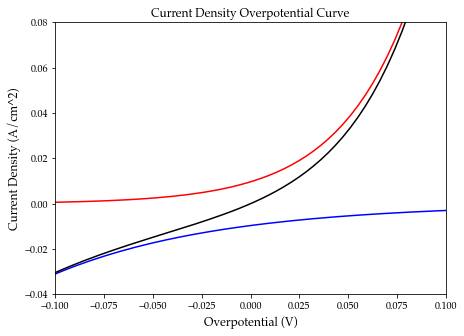

In [117]:
#Plotting for Current Density-Overpotential

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-.04,.08)


plt.plot(Eta,CurrentDensitya, color = 'red')
plt.plot(Eta,CurrentDensityc, color = 'blue')
plt.plot(Eta,CurrentDensitya+CurrentDensityc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')



## Tafel Plot

In [127]:

#Deriving log of current density
CurrentDensityTotal = CurrentDensitya+CurrentDensityc
logja = np.log10(abs(CurrentDensitya))
TafelCurrentDensityc = abs(CurrentDensityc)
logjc = np.log10(TafelCurrentDensityc)



Text(0, 0.5, 'Current Density (A/cm^2)')

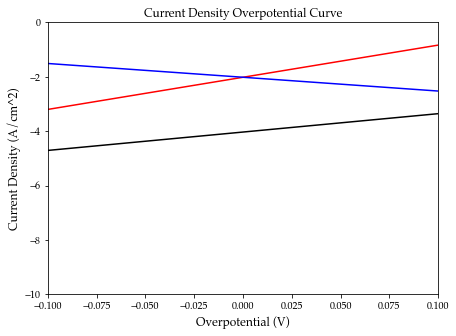

In [128]:
#Plotting for Tafel Plot

fig = plt.figure(figsize = (7,5))

#Axis limits
#plt.xlim(min(Eta),max(Eta))
#plt.ylim(-600,600)
plt.xlim(-.1,.1)
plt.ylim(-10,0)


plt.plot(Eta,logja, color = 'red')
plt.plot(Eta,logjc, color = 'blue')
plt.plot(Eta,logja+logjc, color = 'black')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Current Density Overpotential Curve')
plt.xlabel('Overpotential (V)', fontsize = '12')
plt.ylabel('Current Density (A/cm^2)', fontsize = '12')

# $\iota \eta$ plots


In [137]:
#Constants for 3.3
A = 1
CO = 1.0*10**(-3)
CR = 1.0*10**(-5)
n=1
a=0.5
k=1.0*10**(-4)
f = F/(R*T)
i0 = j0/A
ilc = 1
ila = 1


#Creating the DataFrame full of data
Potential = np.arange(-1.5,0.05,.05)
Overpotential = Potential + 0.5
df = pd.DataFrame({'Potential': Potential, 'Overpotential': Overpotential})
df = df.round(3)



def Current(Overpotential, ilc, ila):
    return (np.exp(-a*f*Overpotential)- np.exp((1-a)*f*Overpotential))/ ((1/i0) + (np.exp(-a*f*Overpotential)/ilc) + (np.exp(-a*f*Overpotential)/ila))

CurrentBT = Current(df.Overpotential, .1, .1)
CurrentBT

0       0.050000
1       0.050000
2       0.050000
3       0.050000
4       0.050000
5       0.050000
6       0.050000
7       0.049999
8       0.049998
9       0.049994
10      0.049985
11      0.049959
12      0.049893
13      0.049717
14      0.049258
15      0.048081
16      0.045211
17      0.038972
18      0.028163
19      0.014496
20      0.000000
21     -0.020414
22     -0.064483
23     -0.176700
24     -0.471991
25     -1.253051
26     -3.320579
27     -8.794084
28    -23.284694
29    -61.647358
30   -163.209297
Name: Overpotential, dtype: float64